In [1]:
___Author___='LumberJack Jyss'

In [2]:
print('LumberJack BRUTAL AtidotCom LSTM\nLumberJack Jyss 5579(c)')

LumberJack BRUTAL AtidotCom LSTM
LumberJack Jyss 5579(c)


In [3]:
import numpy as np
import pandas as pd
import pickle
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import to_categorical
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='bright',style='whitegrid')

Using TensorFlow backend.


In [4]:
#df = pd.read_csv('VIX.csv')
df = pd.read_csv('dataset_Ruled.csv')

In [5]:
df = df.dropna()
#df.iloc[0].column=['Date']
#df = df.drop(['Open_spy','High_spy','Low_spy'],axis=1)

In [6]:
df.set_index('Date', inplace=True)
df.head()

,oc_gbpjpy,hl_gbpjpy,gbpjpy_close,gbpjpy_Doc,gbpjpy_Dhl,rsi_gbpjpy,GBPJPY,short_gbpjpy,long_gbpjpy
Date,,,,,,,,,
20180507 02:00:00,0.1220,0.1670,-0.000826,1.389432,0.362969,6.973080,147.5635,0,0
20180507 02:15:00,0.0060,0.0815,-0.000041,-0.950041,-0.511670,6.532351,147.5575,0,0
20180507 02:30:00,-0.0225,0.0655,0.000152,-4.672131,-0.196078,36.590515,147.5800,0,0
20180507 02:45:00,0.0385,0.0880,-0.000261,-2.723214,0.342988,17.419502,147.5415,0,0
20180507 03:00:00,0.1295,0.1775,-0.000878,2.357513,1.015891,3.849914,147.4120,0,0


In [7]:
delta = df.shape[0]
bloc1 = round(delta*0.9)
bloc2 = delta - bloc1
print("Période d'étude : ",delta,'périodes')
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' périodes \nBloc 2 :',bloc2,' périodes')

Période d'étude :  24469 périodes
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  22022  périodes 
Bloc 2 : 2447  périodes


In [41]:
Xtrain = df.iloc[:bloc1,:7]
Xtest = df.iloc[bloc1:,:7]
ytrain = df.iloc[:bloc1,6]
ytest = df.iloc[bloc1:,6]

In [9]:
Xtrain_long = df.iloc[:bloc1,:5]
Xtest_long = df.iloc[bloc1:,:5]
ytrain_long = df.iloc[:bloc1,7]
ytest_long = df.iloc[bloc1:,7]

In [10]:
Xtrain_short = df.iloc[:bloc1,:5]
Xtest_short = df.iloc[bloc1:,:5]
ytrain_short = df.iloc[:bloc1,6]
ytest_short = df.iloc[bloc1:,6]
print('Split effectué')

Split effectué


In [11]:
Xtrain_long.shape,Xtest_long.shape,ytrain_long.shape,ytest_long.shape

((22022, 5), (2447, 5), (22022,), (2447,))

In [42]:
# reshape input to be 3D [samples, timesteps, features]
Xtrain = Xtrain.values.reshape((Xtrain.shape[0], 1, Xtrain.shape[1]))
Xtest = Xtest.values.reshape((Xtest.shape[0], 1, Xtest.shape[1]))
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((22022, 1, 7), (2447, 1, 7), (22022,), (2447,))

In [13]:
Xtrain_long = Xtrain_long.values.reshape((Xtrain_long.shape[0], 1, Xtrain_long.shape[1]))
Xtest_long = Xtest_long.values.reshape((Xtest_long.shape[0], 1, Xtest_long.shape[1]))
Xtrain_long.shape,Xtest_long.shape,ytrain_long.shape,ytest_long.shape

((22022, 1, 5), (2447, 1, 5), (22022,), (2447,))

In [14]:
Xtrain_short = Xtrain_short.values.reshape((Xtrain_short.shape[0], 1, Xtrain_short.shape[1]))
Xtest_short = Xtest_short.values.reshape((Xtest_short.shape[0], 1, Xtest_short.shape[1]))
Xtrain_short.shape,Xtest_short.shape,ytrain_short.shape,ytest_short.shape

((22022, 1, 5), (2447, 1, 5), (22022,), (2447,))

In [44]:
# design network pred
model = Sequential()
model.add(LSTM(units=50,
    activation='tanh',
    recurrent_activation='hard_sigmoid',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros',
    unit_forget_bias=True,
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    implementation=1,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,
    input_shape=(Xtrain.shape[1],
    Xtrain.shape[2])))

model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
# fit network
history = model.fit(Xtrain, ytrain, epochs=2, batch_size=1,\
                    validation_data=(Xtest, ytest), verbose=1, shuffle=False)

Train on 22022 samples, validate on 2447 samples
Epoch 1/2
22022/22022 [==============================] - 111s 5ms/step - loss: 24.1009 - acc: 6.8114e-04 - val_loss: 1.0914 - val_acc: 0.0000e+00
Epoch 2/2
22022/22022 [==============================] - 110s 5ms/step - loss: 0.2957 - acc: 7.7196e-04 - val_loss: 1.0739 - val_acc: 0.0000e+00


In [41]:
# design network long
model_long = Sequential()
model_long.add(LSTM(units=100,
    activation='tanh',
    recurrent_activation='hard_sigmoid',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros',
    unit_forget_bias=True,
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    implementation=1,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,
    input_shape=(Xtrain_long.shape[1],
    Xtrain_long.shape[2])))

model_long.add(Dense(1))
model_long.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
# fit network
history_long = model_long.fit(Xtrain_long, ytrain_long, epochs=2, batch_size=1,\
                    validation_data=(Xtest_long, ytest_long), verbose=1, shuffle=False)
 

Train on 22022 samples, validate on 2447 samples
Epoch 1/2
22022/22022 [==============================] - 156s 7ms/step - loss: 0.0692 - acc: 0.9354 - val_loss: 0.0239 - val_acc: 0.9771
Epoch 2/2
22022/22022 [==============================] - 152s 7ms/step - loss: 0.0649 - acc: 0.9355 - val_loss: 0.0234 - val_acc: 0.9771


In [53]:
# design network short
model_short = Sequential()
model_short.add(LSTM(units=200,
    activation='tanh',
    recurrent_activation='hard_sigmoid',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros',
    unit_forget_bias=True,
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    implementation=1,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,
    input_shape=(Xtrain_short.shape[1],
    Xtrain_short.shape[2])))

model_short.add(Dense(1))
model_short.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
# fit network
history_short = model_short.fit(Xtrain_short, ytrain_short, epochs=5, batch_size=1,\
                    validation_data=(Xtest_short, ytest_short), verbose=1, shuffle=False)

Train on 22022 samples, validate on 2447 samples
Epoch 1/5
22022/22022 [==============================] - 283s 13ms/step - loss: 6.2885 - acc: 5.9032e-04 - val_loss: 1.4504 - val_acc: 0.0000e+00
Epoch 2/5
22022/22022 [==============================] - 288s 13ms/step - loss: 0.5588 - acc: 8.6277e-04 - val_loss: 1.3095 - val_acc: 0.0000e+00
Epoch 3/5
11054/22022 [==============>...............] - ETA: 2:22 - loss: 0.5386 - acc: 8.1418e-04

KeyboardInterrupt: 

In [17]:
# evaluate the model pred
_, train_acc = model.evaluate(Xtrain, ytrain, verbose=1)
_, test_acc = model.evaluate(Xtest, ytest, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

2447/2447 [==============================] - 0s 51us/step
Train: 0.000, Test: 0.000


In [43]:
# evaluate the model long
_, train_long_acc = model_long.evaluate(Xtrain_long, ytrain_long, verbose=1)
_, test_long_acc = model_long.evaluate(Xtest_long, ytest_long, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_long_acc, test_long_acc))

2447/2447 [==============================] - 0s 68us/step
Train: 0.936, Test: 0.977


In [44]:
# evaluate the model short
_, train_short_acc = model_short.evaluate(Xtrain_short, ytrain_short, verbose=1)
_, test_short_acc = model_short.evaluate(Xtest_short, ytest_short, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_short_acc, test_short_acc))

2447/2447 [==============================] - 0s 62us/step
Train: 0.000, Test: 0.000


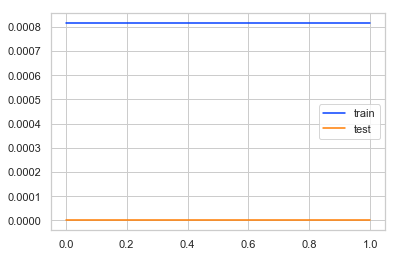

In [19]:
# plot training history pred
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

In [20]:
# plot training history long
plt.plot(history_long.history['acc'], label='train')
plt.plot(history_long.history['val_acc'], label='test')
plt.legend()
plt.show()

NameError: name 'history_long' is not defined

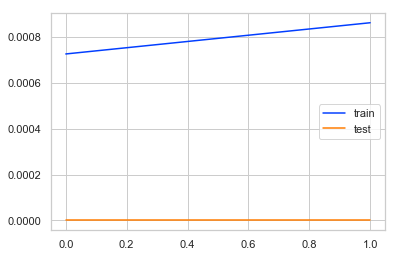

In [45]:
# plot training history short
plt.plot(history_short.history['acc'], label='train')
plt.plot(history_short.history['val_acc'], label='test')
plt.legend()
plt.show()

In [21]:
# plot history
plt.figure(figsize=(16,6))
plt.plot(history_long.history['loss long'], label='train_long')
plt.plot(history_long.history['val_loss long'], label='test_long')
plt.plot(history_short.history['loss short'], label='train_test')
plt.plot(history_short.history['val_loss short'], label='test_test')
plt.plot(history.history['loss pred'], label='train_test')
plt.plot(history.history['val_loss pred'], label='test_test')
plt.legend()
plt.show()

NameError: name 'history_long' is not defined

<Figure size 1152x432 with 0 Axes>

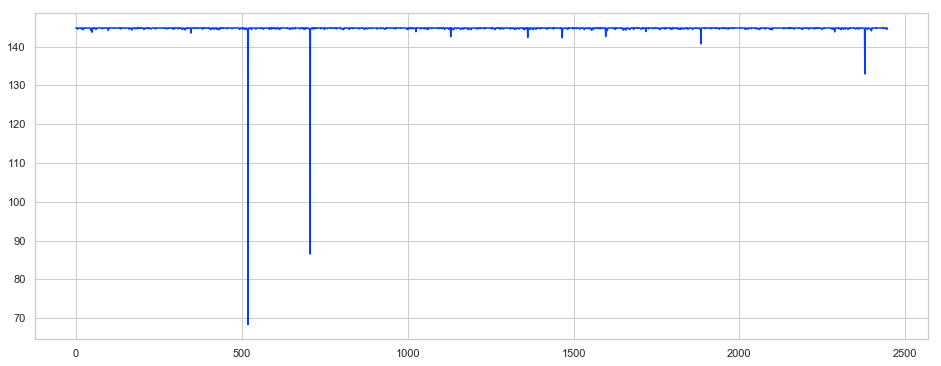

In [22]:
# make a prediction pred
predictions = model.predict(Xtest)
plt.figure(figsize=(16,6))
plt.plot(predictions)

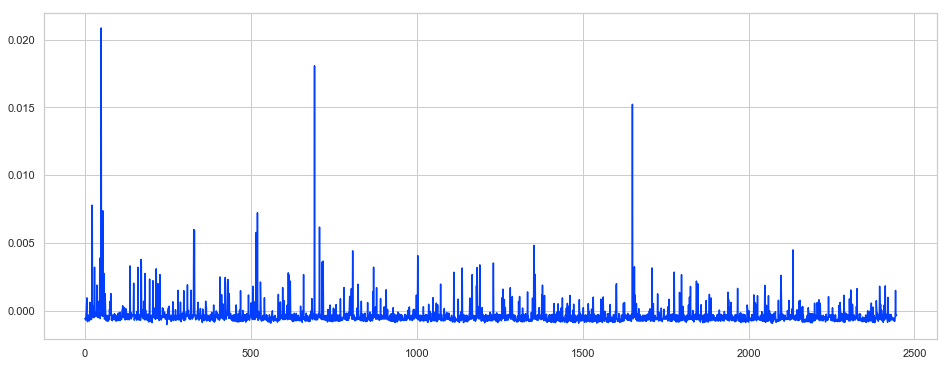

In [47]:
# make a prediction long
predictions_long = model_long.predict(Xtest_long)
plt.figure(figsize=(16,6))
plt.plot(predictions_long)

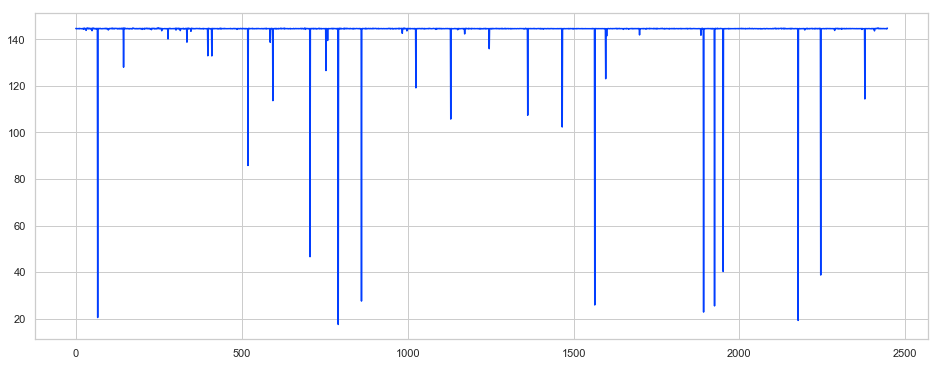

In [49]:
# make a prediction short
predictions_short = model_short.predict(Xtest_short)
plt.figure(figsize=(16,6))
plt.plot(predictions_short)

In [24]:
len(predictions_long),len(predictions_short),len(predictions),len(backtest)

NameError: name 'predictions_long' is not defined

In [25]:
len(predictions[-526:])

526

In [26]:
backtest = pd.DataFrame()
backtest['Close_SPY'] = df.iloc[-526:,6]
backtest['Close_SPY_PRED'] = predictions[-526:]
#backtest['long'] = predictions_long[-526:]
#backtest['short'] = predictions_short[-526:]
backtest.head()

,Close_SPY,Close_SPY_PRED
Date,,
20190426 11:15:00,144.2165,144.796143
20190426 11:30:00,144.2255,144.798645
20190426 11:45:00,144.2755,144.800980
20190426 12:00:00,144.2755,144.801117
20190426 12:15:00,144.3090,144.803070


In [36]:
backtest['DELTA'] = (backtest['Close_SPY'] - backtest['Close_SPY_PRED'])/backtest['Close_SPY_PRED']*100


In [37]:
backtest.head()

,Close_SPY,Close_SPY_PRED,DELTA
Date,,,
20190426 11:15:00,144.2165,144.796143,-0.400316
20190426 11:30:00,144.2255,144.798645,-0.395822
20190426 11:45:00,144.2755,144.800980,-0.362898
20190426 12:00:00,144.2755,144.801117,-0.362992
20190426 12:15:00,144.3090,144.803070,-0.341201


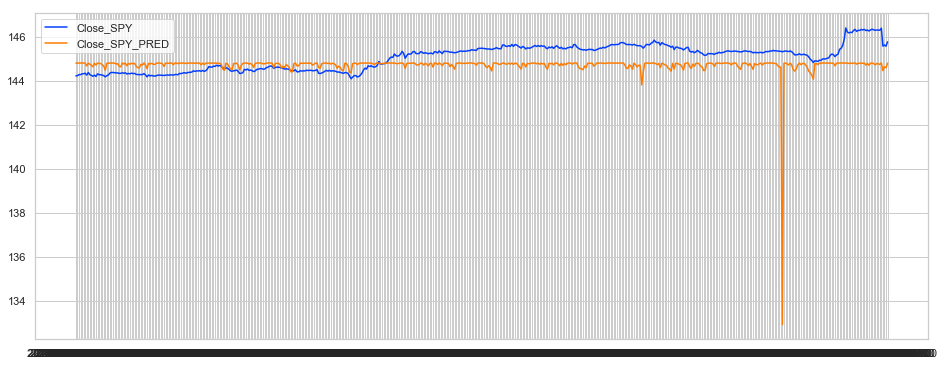

In [40]:
plt.figure(figsize=(16,6))
plt.plot(backtest['Close_SPY'])
plt.plot(backtest['Close_SPY_PRED'])
plt.legend()

In [28]:
long_pos = 0
short_pos = 0
equity = 100000
price_buy_long = 0
price_buy_short = 0
equity_list = []
nb_transaction = 0
col_profit = []
max_gain = (0,0)
max_loss = (0,0)
stop_loss_short = 0.01
stop_loss_long = -0.01
ticket = 100000
target_long = 0.03
target_short = -0.03
longueur = (backtest.shape[0])-1
long_exit = []
short_exit = []
long_sl = []
short_sl = []
go_long = []
go_short = []
lea = 0
sea = 0
gain_sum = 0
loss_sum = 0

print("Boucle de backtest initiée!")

import sys
orig_stdout = sys.stdout
f = open('backtestv2_5.txt', 'w')
sys.stdout = f

for i in range(0,longueur):
    
    if backtest.iloc[i,1] == 1 and long_pos == 0:
        long_pos = 1
        nb_transaction += 1
        price_buy_long = backtest.iloc[i,0]
        equity = equity - 1.5
        equity_list.append(equity)
        col_profit.append(0)
        go_long.append(1)
        print('\n Go Long enclenché le ',backtest.index[i],' pour $',price_buy_long)
        print('Nouvel equity :',equity)
        
    elif backtest.iloc[i,1] == 1 and long_pos == 1 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', On maintient la position long ouverte')
        col_profit.append(0)
    
    elif backtest.iloc[i,1] == 0 and long_pos == 1:
        
        if (backtest.iloc[i,0] - price_buy_long) > target_long:
            print('\n sortie de position long ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_long)
            print('variation des deux ', backtest.iloc[i,0] - price_buy_long)
            print(' pnl :',( backtest.iloc[i,0] - price_buy_long)*ticket)
            equity = equity - 1.5 + ((backtest.iloc[i,0] - price_buy_long) * ticket)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            long_exit.append(1)
            col_profit.append(( backtest.iloc[i,0] - price_buy_long) * ticket)
            if ((backtest.iloc[i,0] - price_buy_long) * n) > max_gain[1]:
                max_gain = (i,((backtest.iloc[i,0] - price_buy_long) * ticket))
                
            equity_list.append(equity)
            gain_sum = gain_sum + (backtest.iloc[i,0] - price_buy_long)*ticket
            long_pos = 0
        
        elif (backtest.iloc[i,0] - price_buy_long) < stop_loss_long:
            equity = equity - 1.5 + ((backtest.iloc[i,0] - price_buy_long) * ticket)
            print('\n sortie stop_loss du long ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_long)
            print(' pnl :',(backtest.iloc[i,0] - price_buy_long)*ticket)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            long_sl.append(1)
            col_profit.append(((backtest.iloc[i,0] - price_buy_long) * ticket))
                
            if ((backtest.iloc[i,0] - price_buy_long) * ticket)< max_loss[1]:
                max_loss = (i,((backtest.iloc[i,0] - price_buy_long) * ticket))
            equity_list.append(equity)
            long_pos = 0
            loss_sum = loss_sum + abs(( backtest.iloc[i,0] - price_buy_long)*ticket)
        
    elif backtest.iloc[i,1] == 0 and long_pos == 0 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', il ne se passe rien')
        col_profit.append(0)
            
for i in range(0,longueur):
    
    if backtest.iloc[i,2] == 1 and short_pos == 0:
        short_pos = 1
        nb_transaction += 1
        price_buy_short = backtest.iloc[i,0]
        equity = equity - 1.5
        equity_list.append(equity)
        col_profit.append(0)
        go_short.append(1)
        print('\n Go Short le ',backtest.index[i],' pour $',price_buy_short)
        print('Le nouvel equity est de :',equity,'$')
        
    elif backtest.iloc[i,2] == 1 and short_pos == 1 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', on reste en position Short')
        col_profit.append(0)
    
    elif backtest.iloc[i,2] == 0 and short_pos == 1:
        
        if (backtest.iloc[i,0] - price_buy_short) < target_short:
            print('\n sortie du position short ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_short)
            print(' pnl :',abs(( backtest.iloc[i,0] - price_buy_short)*ticket))
            equity = equity - 1.5 + abs((backtest.iloc[i,0] - price_buy_short) * ticket)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            short_exit.append(1)
            col_profit.append(abs((( backtest.iloc[i,0] - price_buy_short) * ticket)))
            if abs((backtest.iloc[i,0] - price_buy_short) * ticket) > max_gain[1]:
                max_gain = (i,((backtest.iloc[i,0] - price_buy_short) * ticket))
                
            equity_list.append(equity)
            short_pos = 0
            gain_sum = gain_sum + abs((backtest.iloc[i,0] - price_buy_short) * ticket)
        
        elif (backtest.iloc[i,0] - price_buy_short) > stop_loss_short:
            equity = equity - 1.5 - abs((backtest.iloc[i,0] - price_buy_short)* ticket)
            print('\n sortie stop_loss du short ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_short)
            print(' pnl :',-(backtest.iloc[i,0] - price_buy_short)*ticket)
            print('Le nouvel equity est de :',equity,'$')
            nb_transaction += 1
            short_sl.append(1)
            col_profit.append(((backtest.iloc[i,0] - price_buy_short) * ticket))
                
            if ((backtest.iloc[i,0] - price_buy_short) * ticket) < max_loss[1]:
                max_loss = (i,abs((backtest.iloc[i,0] - price_buy_short) * ticket))
            equity_list.append(equity)
            short_pos = 0
            loss_sum = loss_sum + abs((backtest.iloc[i,0] - price_buy_short) * ticket)
        
    elif backtest.iloc[i,2] == 0 and short_pos == 0 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', il ne se passe rien')
        col_profit.append(0)    


if long_pos == 1 :
    print("Sortie d'une position long en l'air")
    equity = equity - 1.5 + ((backtest.iloc[longueur,0]- price_buy_long) * ticket)
    lea = 1
if short_pos == 1 :
    print("Sortie d'une position short en l'air")
    equity = equity - 1.5 + ((backtest.iloc[longueur,0]- price_buy_short) * ticket)
    sea = 1
    
            
print("\n\033[95m \033[1m Les gains faramineux s'élèvent à : $",equity-100000,'!. En ',nb_transaction,' transactions.' )
f.close()
sys.stdout = orig_stdout
print('Boucle terminée')
print("\n\033[95m \033[1m Les gains faramineux s'élèvent à : $",equity-100000,'!. En ',nb_transaction,' transactions.' )



Boucle de backtest initiée!
Boucle terminée

  Les gains faramineux s'élèvent à : $ 0 !. En  0  transactions.


In [ ]:
backtest_graph = pd.DataFrame()
backtest_graph['equity'] = equity_list
backtest_graph['col_profit'] = col_profit

In [ ]:
plt.figure(figsize=(16,6))
backtest_graph['equity'].plot(ylim=(180000))
plt.legend()

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(backtest_graph['col_profit'])
plt.scatter(max_gain[0],max_gain[1],c='y')
plt.scatter(max_loss[0],max_loss[1],c='r')
plt.legend()

In [ ]:
cumul_profit = sum(col_profit)
nul_profit = col_profit.count(0)
len_profit = len(col_profit)

In [ ]:
print('Période testée :')
print('Début : ',backtest.index[0])
print('Fin : ',backtest.index[-1])
print('ROC long : ',round(roc_long*100,2),'%')
print('ROC short : ',round(roc_short*100,2),'%')
print('Transaction à $100,000')
print('Equity initiale : $200,000')
print('Equity finale : ',round(equity,2))
print('Gain généré :',round(equity-100000,2),'$')
print('Nombre de transactions : ',nb_transaction)
print('Nombre de Long : ',sum(go_long))
print('Nombre de Short : ',sum(go_short))
print('Nombre winners : ',sum(long_exit) + sum(short_exit))
print('Nombre loosers : ',sum(long_sl) + sum(short_sl))
print('Nombre de long winners : ',sum(long_exit))
print('Nombre de short winners : ',sum(short_exit))
print('Nombre de long loosers : ',sum(long_sl))
print('Nombre de short loosers : ',sum(short_sl))
print("Nombre de short en l'air : ", sea)
print("Nombre long en l'air : ",lea)
print('Fees : ',nb_transaction*1.5)
#print('Nombre de positions gagnées',sum(col_is_win))
#print('Nombre de positions perdues',sum(col_close_pos)-sum(col_is_win))
print('Gain maximal',round(max(col_profit),2),' ',round(max_gain[1],2))
print('Perte maximale',round(min(col_profit),2),' ',round(max_loss[1],2))
print('Moyenne du gain',round(((equity-100000)/(nb_transaction/2)),2))
print('Somme de tous les gains',round(gain_sum,2))
print('Somme de tous le loss',round(abs(loss_sum),2))
print('profit factor',round(abs(gain_sum/loss_sum),2))

In [16]:
# save the model to disk
filename_1 = 'lstm_finalized_model_long.sav'
pickle.dump(model_long, open(filename_1, 'wb'))
filename_2 = 'lstm_finalized_model_short.sav'
pickle.dump(model_short, open(filename_2, 'wb'))

In [ ]:
# load the model from disk
filename_1 = 'lstm_finalized_model_long.sav'
filename_2 = 'lstm_finalized_model_short.sav'

loaded_model_long = pickle.load(open(filename_1, 'rb'))
result_long = loaded_model_long.evaluate(Xtest_long, ytest_long,verbose=1)
print(result)

loaded_model_short = pickle.load(open(filename_2, 'rb'))
result_short = loaded_model_short.evaluate(Xtest_short, ytest_short,verbose=1)
print(result)